In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Read 10x File

In [2]:
filename = r'filtered_feature_bc_matrix.h5'
adata = sc.read_10x_h5(filename)
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
adata

AnnData object with n_obs × n_vars = 4138 × 27998
    var: 'gene_ids', 'feature_types', 'genome'

# Mt Gene detect

c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


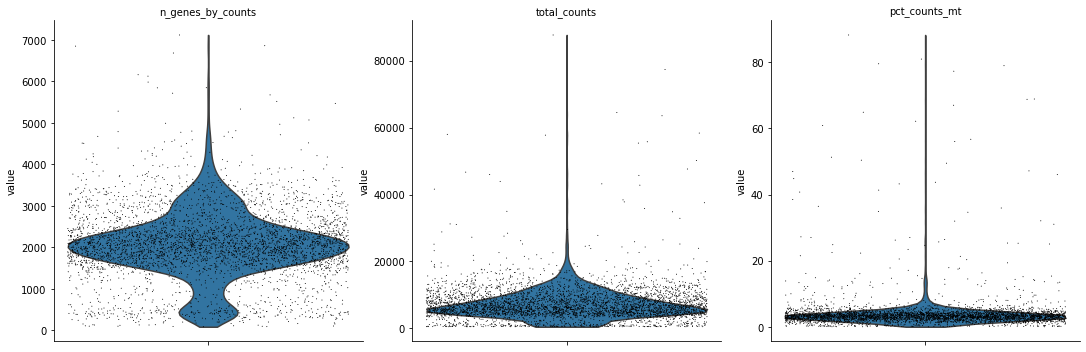

In [4]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

# Doublet detect

In [ ]:
import doubletdetection

clf = doubletdetection.BoostClassifier(
    n_iters=25, 
    use_phenograph=False, 
    standard_scaling=True
)
doublets = clf.fit(adata.X).predict(p_thresh=1e-16, voter_thresh=0.5)
doublet_score = clf.doublet_score()
adata.obs["doublet"] = doublets
adata.obs["doublet_score"] = doublet_score

  0%|          | 0/25 [00:00<?, ?it/s]

# Filter 

In [ ]:
sc.pp.filter_cells(adata,min_genes=0)
sc.pp.filter_genes(adata,min_cells=3)

In [ ]:
low_counts,high_counts=1000,60000
low_gene,high_gene=500,6000
mt_pct=7

In [ ]:
print('low total counts :',len(adata[adata.obs['total_counts']<=low_counts,:]))
print('high total counts:',len(adata[adata.obs['total_counts']>=high_counts,:]))
print('low genes        :',len(adata[adata.obs['n_genes']<=low_gene,:]))
print('high genes       :',len(adata[adata.obs['n_genes']>=high_gene,:]))
print('high mt gene     :',len(adata[adata.obs['pct_counts_mt']>=mt_pct,:]))
print('doublet          :',sum((adata.obs['doublet']==1)))

filtered = sum((adata.obs['doublet']==0)&(adata.obs['pct_counts_mt']<mt_pct)&(adata.obs['n_genes']<high_gene)&(adata.obs['n_genes']>low_gene)&(adata.obs['total_counts']<high_counts)&(adata.obs['total_counts']>low_counts))
print('total filtered    :',len(adata.obs)-filtered)
print('total cell        :',len(adata.obs))

In [19]:
adata=adata[adata.obs['total_counts']>low_counts,:]
adata=adata[adata.obs['total_counts']<high_counts,:]
adata=adata[adata.obs['n_genes']>low_gene,:]
adata=adata[adata.obs['n_genes']<high_gene,:]
adata=adata[adata.obs['pct_counts_mt']<mt_pct,:]
adata=adata[adata.obs['doublet']==0,:]
#print(len(adata.obs))
#adata=adata[(adata.obs['total_counts']>1000)&(adata.obs['total_counts']<60000)&(adata.obs['n_genes']>500)&(adata.obs['n_genes']<6000)&adata.obs['pct_counts_mt']<5,:]

c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_c

In [20]:
adata

View of AnnData object with n_obs × n_vars = 3537 × 13853
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet', 'doublet_score', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [21]:
adata.write('qced_data.h5ad')

c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\anndata\_core\anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
